**Python for Data Analysis - Drug Consumption Dataset**
==============================================

_Authors: LE CHEVALIER Jean, LEDUC Bastien, LE FLOCH Pierrick_

## **Overview**


### Dataset Information

Database contains records for 1885 respondents. For each respondent 12 attributes are known: Personality measurements which include neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness,impulsivity, and sensation seeking,and demographic information like the level of education, age, gender, country of residence and ethnicity. In addition, participants were questioned concerning their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which was introduced to identify over-claimers. For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day.
#### Source
> **Original Data Set can be found here :** [Drug consumption Data Set](https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#)
#### Creators

- Creators: Elaine Fehrman, Vincent Egan, Evgeny M. Mirkes
- Donnor: Evgeny M. Mirkes, Department of Mathematics, University of Leicester, Leicester, LE1 7RH, UK, em322 '@'le.ac.uk
- Date Donated: 2016-10-17



## Data loading and preprocessing

### **Import needed libraries**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import xgboost as xgb
import shap
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import seaborn as sns
import plotly
import copy
import json
from ipywidgets import HBox, VBox

### **Creating shortcuts to access categories of features**

In [2]:
demographic_col = [
    'Age', 
    'Gender', 
    'Education', 
    'Country',
    'Ethnicity',
]

relevant_demographic_col = [
    'Age', 
    'Education'
]

personality_col = [
    'Neuroticism',
    'Extraversion',
    'Openness to experience',
    'Agreeableness',
    'Conscientiousness',
    'Impulsiveness',
    'Sensation seeking'
]

drugs_col = [
    'Alcohol consumption',
    'Amphetamines consumption',
    'Amyl nitrite consumption',
    'Benzodiazepine consumption',
    'Caffeine consumption',
    'Cannabis consumption',
    'Chocolate consumption',
    'Cocaine consumption',
    'Crack consumption',
    'Ecstasy consumption',
    'Heroin consumption',
    'Ketamine consumption',
    'Legal highs consumption',
    'Lysergic acid diethylamide consumption',
    'Methadone consumption',
    'Magic mushrooms consumption',
    'Nicotine consumption',
    'Fictitious drug Semeron consumption',
    'Volatile substance abuse consumption'
]

legal_drugs = ['Alcohol consumption',
               'Caffeine consumption',
               'Chocolate consumption',
               'Nicotine consumption']

illegal_drugs = []

for drug in drugs_col:
    if drug not in legal_drugs:
        illegal_drugs.append(drug)

relevant_features = relevant_demographic_col + personality_col
features = demographic_col + personality_col
all_col = features + drugs_col

### Loading the data

In [3]:
data = pd.read_csv("drug_consumption.data", names= all_col)
data = data.reset_index()
data = data.drop('index',axis=1)
data.head()

Age   Gender  Education  Country  Ethnicity  Neuroticism  Extraversion  \
0  0.49788  0.48246   -0.05921  0.96082    0.12600      0.31287      -0.57545   
1 -0.07854 -0.48246    1.98437  0.96082   -0.31685     -0.67825       1.93886   
2  0.49788 -0.48246   -0.05921  0.96082   -0.31685     -0.46725       0.80523   
3 -0.95197  0.48246    1.16365  0.96082   -0.31685     -0.14882      -0.80615   
4  0.49788  0.48246    1.98437  0.96082   -0.31685      0.73545      -1.63340   

   Openness to experience  Agreeableness  Conscientiousness  ...  \
0                -0.58331       -0.91699           -0.00665  ...   
1                 1.43533        0.76096           -0.14277  ...   
2                -0.84732       -1.62090           -1.01450  ...   
3                -0.01928        0.59042            0.58489  ...   
4                -0.45174       -0.30172            1.30612  ...   

   Ecstasy consumption  Heroin consumption Ketamine consumption  \
0                  CL0                 CL0                  CL0   
1                  CL4                 CL0                  CL2   
2                  CL0                 CL0                  CL0   
3                  CL0                 CL0                  CL2   
4                  CL1                 CL0                  CL0   

  Legal highs consumption Lysergic acid diethylamide consumption  \
0                     CL0                                    CL0   
1                     CL0                                    CL2   
2                     CL0                                    CL0   
3                     CL0                                    CL0   
4                     CL1                                    CL0   

  Methadone consumption Magic mushrooms consumption Nicotine consumption  \
0                   CL0                         CL0                  CL2   
1                   CL3                         CL0                  CL4   
2                   CL0                         CL1                  CL0   
3                   CL0                         CL0                  CL2   
4                   CL0                         CL2                  CL2   

  Fictitious drug Semeron consumption Volatile substance abuse consumption  
0                                 CL0                                  CL0  
1                                 CL0                                  CL0  
2                                 CL0                                  CL0  
3                                 CL0                                  CL0  
4                                 CL0                                  CL0  

[5 rows x 31 columns]

#### A quick look at the columns and their types

In [4]:
data.dtypes

Age                                       float64
Gender                                    float64
Education                                 float64
Country                                   float64
Ethnicity                                 float64
Neuroticism                               float64
Extraversion                              float64
Openness to experience                    float64
Agreeableness                             float64
Conscientiousness                         float64
Impulsiveness                             float64
Sensation seeking                         float64
Alcohol consumption                        object
Amphetamines consumption                   object
Amyl nitrite consumption                   object
Benzodiazepine consumption                 object
Caffeine consumption                       object
Cannabis consumption                       object
Chocolate consumption                      object
Cocaine consumption                        object


### **Remaping the scaled values to meaningful values**


<div class="alert alert-block alert-info">
    <li> The values of the dataset are already scaled to values that are not really meaningfull so we decided to convert them back to more understandable values.</li>
    <li>Based on the documentation on the UCI webite we were able to retrieve the correspondance between each value and it's true meaning.</li>
</div>

In [5]:
Age_info = pd.DataFrame(data=[[-0.95197,"18-24",643,"34.11%"],
                              [-0.07854,"25-34",481,"25.52%"],
                              [0.49788,"35-44",356,"18.89%"],
                              [1.09449,"45-54",294,"15.60%"],
                              [1.82213,"55-64",93,"4.93%"],
                              [2.59171,"65+",18,"0.95%" ]],
                       columns = ["Value", "Meaning", "Cases", "Fraction"])

print("Age (Real) is age of participant and has one of the values:")
Age_info

Age (Real) is age of participant and has one of the values:


Value Meaning  Cases Fraction
0 -0.95197   18-24    643   34.11%
1 -0.07854   25-34    481   25.52%
2  0.49788   35-44    356   18.89%
3  1.09449   45-54    294   15.60%
4  1.82213   55-64     93    4.93%
5  2.59171     65+     18    0.95%

In [6]:
Gender_info = pd.DataFrame(data=[[0.48246,"Female",942,"49.97%"],
                                 [-0.48246,"Male",943,"50.03%"]],
                           columns = ["Value", "Meaning", "Cases", "Fraction"])

print("Gender (Real) is gender of participant:")
Gender_info

Gender (Real) is gender of participant:


Value Meaning  Cases Fraction
0  0.48246  Female    942   49.97%
1 -0.48246    Male    943   50.03%

In [7]:
Education_info = pd.DataFrame(data=[[-2.43591,"Left school before 16 years",28,"1.49%"],
                                    [-1.73790,"Left school at 16 years",99,"5.25%"],
                                    [-1.43719,"Left school at 17 years",30,"1.59%"],
                                    [-1.22751,"Left school at 18 years",100,"5.31%"],
                                    [-0.61113,"Some college or university, no certificate or degree",506,"26.84%"],
                                    [-0.05921,"Professional certificate/ diploma",270,"14.32%"],
                                    [0.45468,"University degree",480,"25.46%"],
                                    [1.16365,"Masters degree",283,"15.01%"],
                                    [1.98437,"Doctorate degree",89,"4.72%"]],
                              columns = ["Value", "Meaning", "Cases", "Fraction"])

print("Education (Real) is level of education of participant and has one of the values:")
Education_info

Education (Real) is level of education of participant and has one of the values:


Value                                            Meaning  Cases Fraction
0 -2.43591                        Left school before 16 years     28    1.49%
1 -1.73790                            Left school at 16 years     99    5.25%
2 -1.43719                            Left school at 17 years     30    1.59%
3 -1.22751                            Left school at 18 years    100    5.31%
4 -0.61113  Some college or university, no certificate or ...    506   26.84%
5 -0.05921                  Professional certificate/ diploma    270   14.32%
6  0.45468                                  University degree    480   25.46%
7  1.16365                                     Masters degree    283   15.01%
8  1.98437                                   Doctorate degree     89    4.72%

In [8]:
Country_info = pd.DataFrame(data=[[-0.09765,"Australia",54,"2.86%"],
                                  [0.24923,"Canada",87,"4.62%"],
                                  [-0.46841,"New Zealand",5,"0.27%"],
                                  [-0.28519,"Other",118,"6.26%"],
                                  [0.21128,"Republic of Ireland",20,"1.06%"],
                                  [0.96082,"UK",1044,"55.38%"],
                                  [-0.57009,"USA",557,"29.55%" ]],
                            columns = ["Value", "Meaning", "Cases", "Fraction"])

print("Country (Real) is country of current residence of participant and has one of the values:")
Country_info

Country (Real) is country of current residence of participant and has one of the values:


Value              Meaning  Cases Fraction
0 -0.09765            Australia     54    2.86%
1  0.24923               Canada     87    4.62%
2 -0.46841          New Zealand      5    0.27%
3 -0.28519                Other    118    6.26%
4  0.21128  Republic of Ireland     20    1.06%
5  0.96082                   UK   1044   55.38%
6 -0.57009                  USA    557   29.55%

In [9]:
Ethnicity_info = pd.DataFrame(data=[[-0.50212,"Asian",26,"1.38%"],
                                    [-1.10702,"Black",33,"1.75%"],
                                    [1.90725,"Mixed-Black/Asian",3,"0.16%"],
                                    [0.12600,"Mixed-White/Asian",20,"1.06%"],
                                    [-0.22166,"Mixed-White/Black",20,"1.06%"],
                                    [0.11440,"Other",63,"3.34%"],
                                    [-0.31685,"White",1720,"91.25%"]],
                              columns = ["Value", "Meaning", "Cases", "Fraction"])

print("Ethnicity (Real) is ethnicity of participant and has one of the values:")
Ethnicity_info

Ethnicity (Real) is ethnicity of participant and has one of the values:


Value            Meaning  Cases Fraction
0 -0.50212              Asian     26    1.38%
1 -1.10702              Black     33    1.75%
2  1.90725  Mixed-Black/Asian      3    0.16%
3  0.12600  Mixed-White/Asian     20    1.06%
4 -0.22166  Mixed-White/Black     20    1.06%
5  0.11440              Other     63    3.34%
6 -0.31685              White   1720   91.25%

<div class="alert alert-block alert-info">
    <li> Here, we create an other dataframe as <code>clean_data</code> to preserve the original dataframe</li>
</div>

In [10]:
clean_data = data.copy()
clean_data.head()

Age   Gender  Education  Country  Ethnicity  Neuroticism  Extraversion  \
0  0.49788  0.48246   -0.05921  0.96082    0.12600      0.31287      -0.57545   
1 -0.07854 -0.48246    1.98437  0.96082   -0.31685     -0.67825       1.93886   
2  0.49788 -0.48246   -0.05921  0.96082   -0.31685     -0.46725       0.80523   
3 -0.95197  0.48246    1.16365  0.96082   -0.31685     -0.14882      -0.80615   
4  0.49788  0.48246    1.98437  0.96082   -0.31685      0.73545      -1.63340   

   Openness to experience  Agreeableness  Conscientiousness  ...  \
0                -0.58331       -0.91699           -0.00665  ...   
1                 1.43533        0.76096           -0.14277  ...   
2                -0.84732       -1.62090           -1.01450  ...   
3                -0.01928        0.59042            0.58489  ...   
4                -0.45174       -0.30172            1.30612  ...   

   Ecstasy consumption  Heroin consumption Ketamine consumption  \
0                  CL0                 CL0                  CL0   
1                  CL4                 CL0                  CL2   
2                  CL0                 CL0                  CL0   
3                  CL0                 CL0                  CL2   
4                  CL1                 CL0                  CL0   

  Legal highs consumption Lysergic acid diethylamide consumption  \
0                     CL0                                    CL0   
1                     CL0                                    CL2   
2                     CL0                                    CL0   
3                     CL0                                    CL0   
4                     CL1                                    CL0   

  Methadone consumption Magic mushrooms consumption Nicotine consumption  \
0                   CL0                         CL0                  CL2   
1                   CL3                         CL0                  CL4   
2                   CL0                         CL1                  CL0   
3                   CL0                         CL0                  CL2   
4                   CL0                         CL2                  CL2   

  Fictitious drug Semeron consumption Volatile substance abuse consumption  
0                                 CL0                                  CL0  
1                                 CL0                                  CL0  
2                                 CL0                                  CL0  
3                                 CL0                                  CL0  
4                                 CL0                                  CL0  

[5 rows x 31 columns]

Checking if there is any null or NA values

In [11]:
clean_data.isnull().values.any()

False

### Remaping the CL0 to CL6 classification to a 0 to 6 range

In [12]:
def map_conso_score(df):    
    for i in drugs_col:
        df[i] = df[i].map({'CL0': 0, 'CL1': 1, 'CL2': 2, 'CL3': 3, 'CL4': 4, 'CL5': 5, 'CL6': 6})
        

We apply this function on ```clean_data``` to get numerical score for each drug

In [13]:
map_conso_score(clean_data)
clean_data.head()

Age   Gender  Education  Country  Ethnicity  Neuroticism  Extraversion  \
0  0.49788  0.48246   -0.05921  0.96082    0.12600      0.31287      -0.57545   
1 -0.07854 -0.48246    1.98437  0.96082   -0.31685     -0.67825       1.93886   
2  0.49788 -0.48246   -0.05921  0.96082   -0.31685     -0.46725       0.80523   
3 -0.95197  0.48246    1.16365  0.96082   -0.31685     -0.14882      -0.80615   
4  0.49788  0.48246    1.98437  0.96082   -0.31685      0.73545      -1.63340   

   Openness to experience  Agreeableness  Conscientiousness  ...  \
0                -0.58331       -0.91699           -0.00665  ...   
1                 1.43533        0.76096           -0.14277  ...   
2                -0.84732       -1.62090           -1.01450  ...   
3                -0.01928        0.59042            0.58489  ...   
4                -0.45174       -0.30172            1.30612  ...   

   Ecstasy consumption  Heroin consumption  Ketamine consumption  \
0                    0                   0                     0   
1                    4                   0                     2   
2                    0                   0                     0   
3                    0                   0                     2   
4                    1                   0                     0   

   Legal highs consumption  Lysergic acid diethylamide consumption  \
0                        0                                       0   
1                        0                                       2   
2                        0                                       0   
3                        0                                       0   
4                        1                                       0   

   Methadone consumption  Magic mushrooms consumption  Nicotine consumption  \
0                      0                            0                     2   
1                      3                            0                     4   
2                      0                            1                     0   
3                      0                            0                     2   
4                      0                            2                     2   

   Fictitious drug Semeron consumption  Volatile substance abuse consumption  
0                                    0                                     0  
1                                    0                                     0  
2                                    0                                     0  
3                                    0                                     0  
4                                    0                                     0  

[5 rows x 31 columns]

In [14]:
clean_data = clean_data[clean_data["Fictitious drug Semeron consumption"]==0]
clean_data.reset_index(drop=True,inplace=True)
clean_data = clean_data.drop("Fictitious drug Semeron consumption",axis=1)
clean_data

Age   Gender  Education  Country  Ethnicity  Neuroticism  \
0     0.49788  0.48246   -0.05921  0.96082    0.12600      0.31287   
1    -0.07854 -0.48246    1.98437  0.96082   -0.31685     -0.67825   
2     0.49788 -0.48246   -0.05921  0.96082   -0.31685     -0.46725   
3    -0.95197  0.48246    1.16365  0.96082   -0.31685     -0.14882   
4     0.49788  0.48246    1.98437  0.96082   -0.31685      0.73545   
...       ...      ...        ...      ...        ...          ...   
1872 -0.95197  0.48246   -0.61113 -0.57009   -0.31685     -1.19430   
1873 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685     -0.24649   
1874 -0.07854  0.48246    0.45468 -0.57009   -0.31685      1.13281   
1875 -0.95197  0.48246   -0.61113 -0.57009   -0.31685      0.91093   
1876 -0.95197 -0.48246   -0.61113  0.21128   -0.31685     -0.46725   

      Extraversion  Openness to experience  Agreeableness  Conscientiousness  \
0         -0.57545                -0.58331       -0.91699           -0.00665   
1          1.93886                 1.43533        0.76096           -0.14277   
2          0.80523                -0.84732       -1.62090           -1.01450   
3         -0.80615                -0.01928        0.59042            0.58489   
4         -1.63340                -0.45174       -0.30172            1.30612   
...            ...                     ...            ...                ...   
1872       1.74091                 1.88511        0.76096           -1.13788   
1873       1.74091                 0.58331        0.76096           -1.51840   
1874      -1.37639                -1.27553       -1.77200           -1.38502   
1875      -1.92173                 0.29338       -1.62090           -2.57309   
1876       2.12700                 1.65653        1.11406            0.41594   

      ...  Crack consumption  Ecstasy consumption  Heroin consumption  \
0     ...                  0                    0                   0   
1     ...                  0                    4                   0   
2     ...                  0                    0                   0   
3     ...                  0                    0                   0   
4     ...                  0                    1                   0   
...   ...                ...                  ...                 ...   
1872  ...                  0                    0                   0   
1873  ...                  0                    2                   0   
1874  ...                  0                    4                   0   
1875  ...                  0                    3                   0   
1876  ...                  0                    3                   0   

      Ketamine consumption  Legal highs consumption  \
0                        0                        0   
1                        2                        0   
2                        0                        0   
3                        2                        0   
4                        0                        1   
...                    ...                      ...   
1872                     0                        3   
1873                     0                        3   
1874                     2                        0   
1875                     0                        3   
1876                     0                        3   

      Lysergic acid diethylamide consumption  Methadone consumption  \
0                                          0                      0   
1                                          2                      3   
2                                          0                      0   
3                                          0                      0   
4                                          0                      0   
...                                      ...                    ...   
1872                                       3                      0   
1873                                       5                      4   
1874                           

### Function to replace the scaled values of the dataset to meaningful strings on the demographic features

In [15]:
def replace_by_meaning(dataset):
    Age = ["18-24" if age <=-0.9 else
           "25-34" if age <=-0 else
           "35-44" if age <=0.5 else
           "45-54" if age <=1.5 else
           "55-64" if age <=2 else
           "65+"
           for age in dataset["Age"]]
    
    Gender = ["Male" if gender <=-0.4 else "Female" for gender in dataset["Gender"]]
    
    Education = ["Left school before 16 years" if education <=-2 else
                 "Left school at 16 years" if education <=-1.5 else
                 "Left school at 17 years" if education <=-1.4 else
                 "Left school at 18 years" if education <=-1 else
                 "Some college or university, no certificate or degree" if education <=-0.5 else
                 "Professional certificate/ diploma" if education <= 0 else
                 "University degree" if education <= 0.5 else
                 "Masters degree" if education <= 1.5 else
                 "Doctorate degree"
                 for education in dataset["Education"]]
    
    Country = ["USA" if cty <=-0.5 else
               "New Zealand" if cty <=-0.4 else
               "Other" if cty <=-0.2 else
               "Australia" if cty <=0 else
               "Republic of Ireland" if cty <=0.22 else
               "Canada" if cty <=0.25 else
               "UK"
               for cty in dataset["Country"]]
    
    Ethnicity = ["Black" if eth <=-1 else
                 "Asian" if eth <=-0.5 else
                 "White" if eth <=-0.3 else
                 "Mixed-White/Black" if eth <=-0.2 else
                 "Other" if eth <=0.12 else
                 "Mixed-White/Asian" if eth <=0.13 else
                 "Mixed-Black/Asian"
                 for eth in dataset["Ethnicity"]]
    dataset["Age"] = Age
    dataset["Gender"] = Gender
    dataset["Education"] = Education
    dataset["Country"] = Country
    dataset["Ethnicity"] = Ethnicity

In [16]:
replace_by_meaning(clean_data)
clean_data[demographic_col].head()

Age  Gender                          Education Country          Ethnicity
0  35-44  Female  Professional certificate/ diploma      UK  Mixed-White/Asian
1  25-34    Male                   Doctorate degree      UK              White
2  35-44    Male  Professional certificate/ diploma      UK              White
3  18-24  Female                     Masters degree      UK              White
4  35-44  Female                   Doctorate degree      UK              White

<div class="alert alert-block alert-info">
    <b>Remark:</b><br>
    <li> The Semeron is a fictive drug inserted in the study to catch liars.</li>
    <li> The persons that claimed to use the Semeron obviously lied because this drug does not exist. We can therefore have serious doubts as to the veracity of the rest of the information they provided during the survey, particularly on their consumption of other drugs. </li>
    <li> That is why we chose to delete their entries of the dataset we will use for the data vizualisation. But we still registered these value into <code>semeron_users</code> to analyze what are their answers to the test</li>
</div>


In [17]:
semeron_users = data[data["Fictitious drug Semeron consumption"]!="CL0"].copy()
semeron_users.reset_index(drop=True,inplace=True)
map_conso_score(semeron_users)
replace_by_meaning(semeron_users)
semeron_users.head()

Age  Gender                                          Education  \
0  25-34  Female                            Left school at 16 years   
1  18-24    Male  Some college or university, no certificate or ...   
2  18-24    Male  Some college or university, no certificate or ...   
3  18-24  Female  Some college or university, no certificate or ...   
4  35-44  Female                                  University degree   

     Country Ethnicity  Neuroticism  Extraversion  Openness to experience  \
0  Australia     White     -0.58016       0.32197                 0.14143   
1  Australia     Asian     -0.67825       1.74091                 0.72330   
2        USA     White     -0.24649      -0.80615                -1.27553   
3        USA     Other     -0.46725       0.80523                 0.29338   
4        USA     White      1.98437      -0.80615                 2.15324   

   Agreeableness  Conscientiousness  ...  Ecstasy consumption  \
0       -0.60633            0.12331  ...                    2   
1        0.13136            0.41594  ...                    3   
2       -1.34289           -1.92173  ...                    1   
3        2.03972            1.81175  ...                    4   
4        0.76096           -0.00665  ...                    2   

   Heroin consumption  Ketamine consumption  Legal highs consumption  \
0                   2                     2                        0   
1                   0                     0                        0   
2                   2                     1                        2   
3                   0                     4                        3   
4                   0                     2                        2   

   Lysergic acid diethylamide consumption  Methadone consumption  \
0                                       4                      2   
1                                       5                      0   
2                                       1                      2   
3                                       2                      0   
4                                       2                      0   

   Magic mushrooms consumption  Nicotine consumption  \
0                            6                     6   
1                            5                     4   
2                            4                     2   
3                            3                     4   
4                            2                     6   

   Fictitious drug Semeron consumption  Volatile substance abuse consumption  
0                                    2                                     2  
1                                    3                                     0  
2                                    3                                     1  
3                                    4                                     3  
4                                    2                                     0  

[5 rows x 31 columns]

<div class="alert alert-block alert-info">
    <li> We will also need a data frame that keeps the original scaled values to make correlation matrix between features. We store these values into <code>clean_data_numeric</code></li>
</div>

In [18]:
clean_data_numeric = data.copy()
map_conso_score(clean_data_numeric)
clean_data_numeric = clean_data_numeric[clean_data_numeric["Fictitious drug Semeron consumption"]==0]
clean_data_numeric.reset_index(drop=True,inplace=True)
clean_data_numeric = clean_data_numeric.drop("Fictitious drug Semeron consumption",axis=1)
clean_data_numeric

Age   Gender  Education  Country  Ethnicity  Neuroticism  \
0     0.49788  0.48246   -0.05921  0.96082    0.12600      0.31287   
1    -0.07854 -0.48246    1.98437  0.96082   -0.31685     -0.67825   
2     0.49788 -0.48246   -0.05921  0.96082   -0.31685     -0.46725   
3    -0.95197  0.48246    1.16365  0.96082   -0.31685     -0.14882   
4     0.49788  0.48246    1.98437  0.96082   -0.31685      0.73545   
...       ...      ...        ...      ...        ...          ...   
1872 -0.95197  0.48246   -0.61113 -0.57009   -0.31685     -1.19430   
1873 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685     -0.24649   
1874 -0.07854  0.48246    0.45468 -0.57009   -0.31685      1.13281   
1875 -0.95197  0.48246   -0.61113 -0.57009   -0.31685      0.91093   
1876 -0.95197 -0.48246   -0.61113  0.21128   -0.31685     -0.46725   

      Extraversion  Openness to experience  Agreeableness  Conscientiousness  \
0         -0.57545                -0.58331       -0.91699           -0.00665   
1          1.93886                 1.43533        0.76096           -0.14277   
2          0.80523                -0.84732       -1.62090           -1.01450   
3         -0.80615                -0.01928        0.59042            0.58489   
4         -1.63340                -0.45174       -0.30172            1.30612   
...            ...                     ...            ...                ...   
1872       1.74091                 1.88511        0.76096           -1.13788   
1873       1.74091                 0.58331        0.76096           -1.51840   
1874      -1.37639                -1.27553       -1.77200           -1.38502   
1875      -1.92173                 0.29338       -1.62090           -2.57309   
1876       2.12700                 1.65653        1.11406            0.41594   

      ...  Crack consumption  Ecstasy consumption  Heroin consumption  \
0     ...                  0                    0                   0   
1     ...                  0                    4                   0   
2     ...                  0                    0                   0   
3     ...                  0                    0                   0   
4     ...                  0                    1                   0   
...   ...                ...                  ...                 ...   
1872  ...                  0                    0                   0   
1873  ...                  0                    2                   0   
1874  ...                  0                    4                   0   
1875  ...                  0                    3                   0   
1876  ...                  0                    3                   0   

      Ketamine consumption  Legal highs consumption  \
0                        0                        0   
1                        2                        0   
2                        0                        0   
3                        2                        0   
4                        0                        1   
...                    ...                      ...   
1872                     0                        3   
1873                     0                        3   
1874                     2                        0   
1875                     0                        3   
1876                     0                        3   

      Lysergic acid diethylamide consumption  Methadone consumption  \
0                                          0                      0   
1                                          2                      3   
2                                          0                      0   
3                                          0                      0   
4                                          0                      0   
...                                      ...                    ...   
1872                                       3                      0   
1873                                       5                      4   
1874                           

### Remapping the shortcuts without semeron

In [19]:
drugs_col = [
    'Alcohol consumption',
    'Amphetamines consumption',
    'Amyl nitrite consumption',
    'Benzodiazepine consumption',
    'Caffeine consumption',
    'Cannabis consumption',
    'Chocolate consumption',
    'Cocaine consumption',
    'Crack consumption',
    'Ecstasy consumption',
    'Heroin consumption',
    'Ketamine consumption',
    'Legal highs consumption',
    'Lysergic acid diethylamide consumption',
    'Methadone consumption',
    'Magic mushrooms consumption',
    'Nicotine consumption',
    'Volatile substance abuse consumption'
]

legal_drugs = ['Alcohol consumption',
               'Caffeine consumption',
               'Chocolate consumption',
               'Nicotine consumption']

illegal_drugs = []

for drug in drugs_col:
    if drug not in legal_drugs:
        illegal_drugs.append(drug)


features = demographic_col + personality_col
all_col = features + drugs_col

### Binarization of the drug consumption

<div class="alert alert-block alert-info">
    <li> Finally we wanted to have a dataset where the output is binary for each drug simplifying the 0 to 6 range to a 0 or 1 value.</li>
    <li> 0 means that the person is considered as a non-recent user of the drug and 1 means that the person is considered as a recent user of the drug. </li>
    <li> A recent user is defined as a person who has used the drug in the last 30 days.</li>
</div>

In [20]:
# Binarization for recent user/non-recent user
bin_outputs = clean_data_numeric.copy()
for i in range(len(bin_outputs)):
    for drug in drugs_col:
        if bin_outputs.loc[i,drug]>3:
            bin_outputs.loc[i,drug]=1
        else:
            bin_outputs.loc[i,drug]=0
bin_outputs

Age   Gender  Education  Country  Ethnicity  Neuroticism  \
0     0.49788  0.48246   -0.05921  0.96082    0.12600      0.31287   
1    -0.07854 -0.48246    1.98437  0.96082   -0.31685     -0.67825   
2     0.49788 -0.48246   -0.05921  0.96082   -0.31685     -0.46725   
3    -0.95197  0.48246    1.16365  0.96082   -0.31685     -0.14882   
4     0.49788  0.48246    1.98437  0.96082   -0.31685      0.73545   
...       ...      ...        ...      ...        ...          ...   
1872 -0.95197  0.48246   -0.61113 -0.57009   -0.31685     -1.19430   
1873 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685     -0.24649   
1874 -0.07854  0.48246    0.45468 -0.57009   -0.31685      1.13281   
1875 -0.95197  0.48246   -0.61113 -0.57009   -0.31685      0.91093   
1876 -0.95197 -0.48246   -0.61113  0.21128   -0.31685     -0.46725   

      Extraversion  Openness to experience  Agreeableness  Conscientiousness  \
0         -0.57545                -0.58331       -0.91699           -0.00665   
1          1.93886                 1.43533        0.76096           -0.14277   
2          0.80523                -0.84732       -1.62090           -1.01450   
3         -0.80615                -0.01928        0.59042            0.58489   
4         -1.63340                -0.45174       -0.30172            1.30612   
...            ...                     ...            ...                ...   
1872       1.74091                 1.88511        0.76096           -1.13788   
1873       1.74091                 0.58331        0.76096           -1.51840   
1874      -1.37639                -1.27553       -1.77200           -1.38502   
1875      -1.92173                 0.29338       -1.62090           -2.57309   
1876       2.12700                 1.65653        1.11406            0.41594   

      ...  Crack consumption  Ecstasy consumption  Heroin consumption  \
0     ...                  0                    0                   0   
1     ...                  0                    1                   0   
2     ...                  0                    0                   0   
3     ...                  0                    0                   0   
4     ...                  0                    0                   0   
...   ...                ...                  ...                 ...   
1872  ...                  0                    0                   0   
1873  ...                  0                    0                   0   
1874  ...                  0                    1                   0   
1875  ...                  0                    0                   0   
1876  ...                  0                    0                   0   

      Ketamine consumption  Legal highs consumption  \
0                        0                        0   
1                        0                        0   
2                        0                        0   
3                        0                        0   
4                        0                        0   
...                    ...                      ...   
1872                     0                        0   
1873                     0                        0   
1874                     0                        0   
1875                     0                        0   
1876                     0                        0   

      Lysergic acid diethylamide consumption  Methadone consumption  \
0                                          0                      0   
1                                          0                      0   
2                                          0                      0   
3                                          0                      0   
4                                          0                      0   
...                                      ...                    ...   
1872                                       0                      0   
1873                                       1                      1   
1874                           

## Useful functions

In [21]:
colors = px.colors.sequential.YlOrRd

In [22]:
def count_cases(feature,dataset):
    res = {"keys":list(sorted(set(dataset[feature]))),"vals":[0 for i in range(len(set(dataset[feature])))]}
    for i in range(0,len(res["keys"])):
        for element in dataset[feature]:
            if element==res["keys"][i]:
                res["vals"][i]+=1
    return res

In [23]:
def scree_plot(X,pc=3):
    pcamodel = PCA(n_components=pc)
    pca = pcamodel.fit_transform(X)
    plt.figure()
    plt.bar(range(1,len(pcamodel.explained_variance_ratio_ )+1),pcamodel.explained_variance_ratio_ )
    plt.ylabel('Explained variance %')
    plt.xlabel('Components')
    plt.plot(range(1,len(pcamodel.explained_variance_ratio_ )+1),
             np.cumsum(pcamodel.explained_variance_ratio_),
             c='red',
             label="Cumulative Explained Variance Ratio")
    plt.legend(loc='upper left')
    plt.show()
    print(pcamodel.explained_variance_ratio_)

In [24]:
def biplot(X):
    pcamodel = PCA(n_components=2)
    pca = pcamodel.fit_transform(X)
    score=pca[:,0:2]
    coeff=np.transpose(pcamodel.components_[0:2, :])
    labels=list(X.columns)
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.figure()
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    plt.show()

In [25]:
def pca_scatter(X):
    pca = PCA(n_components=2)
    components = pca.fit_transform(X)

    fig = px.scatter(components, x=0, y=1, color=X.iloc[:,-1])
    fig.update_layout(
        margin=dict(l=30, r=30, t=30, b=30),
    )
    fig.show()

In [26]:
def pca_scatter_3D(X):
    pca = PCA(n_components=3)
    components = pca.fit_transform(X)
    total_var = pca.explained_variance_ratio_.sum() * 100
    fig = px.scatter_3d(
        components, 
        x=0, y=1, z=2,
        color=X.iloc[:,-1],
        title=f'Total Explained Variance: {total_var:.2f}%',
        labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'})
    fig.show()

In [27]:
def pca_contribution(X):
    X_scaled = pd.DataFrame(preprocessing.scale(X),columns = X.columns) 
    # PCA
    pca = PCA(n_components=3)
    pca.fit_transform(X_scaled)
    # Dump components relations with features:
    print(pd.DataFrame(pca.components_,columns=X_scaled.columns,index = ['PC-1','PC-2','PC-3']))

In [28]:
def pca(drug_name,binary=False):
    if not binary:
        X = clean_data_numeric.iloc[:,0:12]
        X[drug_name] = clean_data_numeric.loc[:,drug_name]
    else:
        X = bin_outputs.iloc[:,0:12]
        X[drug_name] = bin_outputs.loc[:,drug_name]
    print("Scree plot")
    scree_plot(X,5)
    print("Biplot")
    biplot(X)
    print("Scatter plot 2D")
    pca_scatter(X)
    print("Scatter plot 3D")
    pca_scatter_3D(X)
    print("Contributions")
    pca_contribution(X)

In [29]:
def pie(feature,dataset,rotation=0):
    count_values = count_cases(feature,dataset)
    fig = go.Figure(data=[go.Pie(values=count_values["vals"], labels=count_values["keys"],marker_colors=colors,rotation=rotation)])
    fig.update_layout(title_text=f"{feature} of the participants")
    return go.FigureWidget(fig)

In [30]:
def bar(feature,dataset):
    count_values = count_cases(feature,dataset)
    fig = go.Figure(data=[go.Bar(
        x=count_values["keys"],
        y=count_values["vals"],
        marker_color=colors # marker color can be a single color value or an iterable
    )])
    fig.update_layout(title_text=f'{feature} of the participants')
    fig.update_layout(
        margin=dict(l=30, r=30, t=30, b=30))
    return fig

In [31]:
def heatmap(df,category):
    X=df.loc[:,category].astype(float)
    x_list = strip_consumption(category)
    y_list = strip_consumption(list(df.index))
    X=X.to_numpy()
    #X=np.around(X,2)
    fig = ff.create_annotated_heatmap(X, colorscale='Reds',x=x_list, y=y_list,reversescale=False)
    if(len(category)>10):
        fig.update_layout(
        autosize=False,
        width=900,
        height=900
        )
    else:   
        fig.update_layout(
        autosize=False,
        width=700,
        height=700
        )
    return fig

In [32]:
def corr_heatmap(category,df):
    X=df[category].astype(float).corr(method='spearman')
    if any("consumption" in elem for elem in category):
        x_list = list(X.index)
        for i in range(len(x_list)):
            x_list[i] = x_list[i][:-12]
        y_list=x_list
    else:
        x_list = list(X.index)
        y_list = list(X.columns)
    X=X.to_numpy()
    X=np.around(X,2)
    fig = ff.create_annotated_heatmap(X, colorscale='RdBu',x=x_list, y=y_list,reversescale=True)
    if(len(category)>10):
        fig.update_layout(
        autosize=False,
        width=900,
        height=900
        )
    else:   
        fig.update_layout(
        autosize=False,
        width=700,
        height=700
        )
    return fig

In [33]:
def corr_heatmap_2(category1,category2,df):
    all_labels = category1+category2
    X=df[all_labels].astype(float).corr(method='spearman')
    x_list = strip_consumption(list(category2))
    y_list = strip_consumption(list(category1))
    X = X.loc[category1,category2]
    X=X.to_numpy()
    X=np.around(X,2)
    fig = ff.create_annotated_heatmap(X, colorscale='RdBu',x=x_list, y=y_list,reversescale=True)
    if(len(category1)>10 or len(category2)>10):
        fig.update_layout(
        autosize=False,
        width=900,
        height=900
        )
    else:   
        fig.update_layout(
        autosize=False,
        width=700,
        height=700
        )
    return fig

In [34]:
def strip_consumption(label_list):
    res = copy.deepcopy(label_list)
    for i in range(len(res)):
        if type(res[i]) == str:
            if "consumption" in res[i]:
                res[i]=res[i][:-12]
    return res

# **Exploration of the dataset**


## **Analysis of the "Semeron users"**

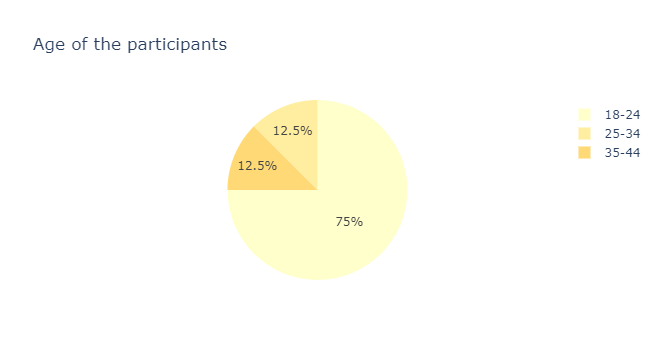

In [35]:
pie("Age",semeron_users).show()

### Heatmap of the last use of the drugs for the semeron users

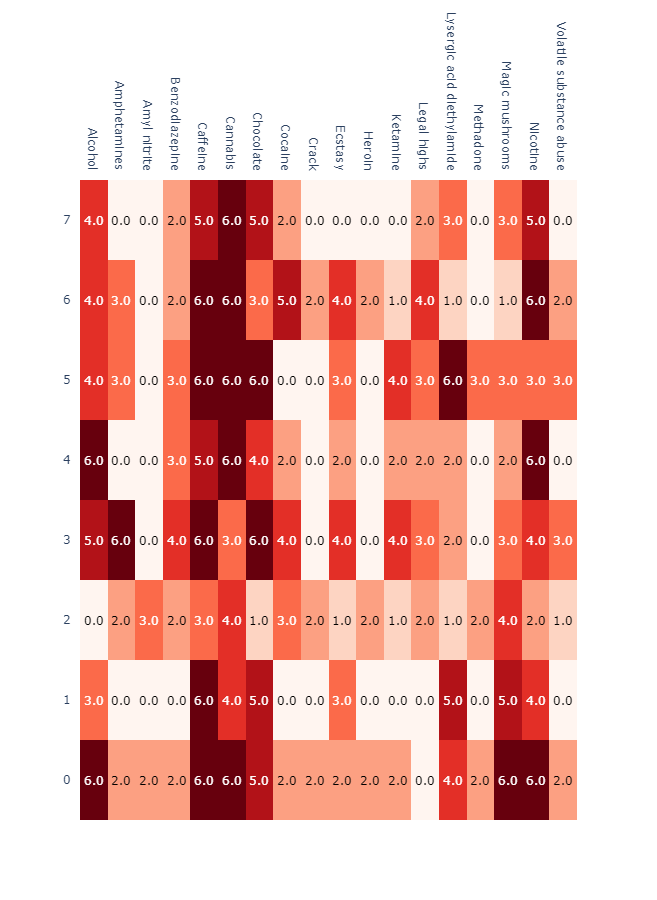

In [36]:
heatmap(semeron_users,drugs_col)

### Comparison of the mean score of consumption between "Semeron users" and other respondants

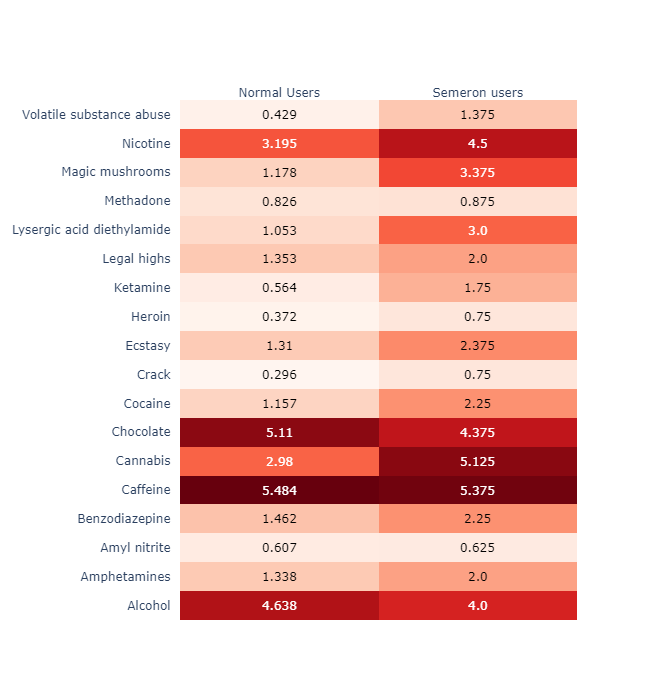

In [37]:
frame = { 'Normal Users': round(clean_data[drugs_col].mean(),3), 'Semeron users': semeron_users[drugs_col].mean() }
  
comparison = pd.DataFrame(frame)
heatmap(comparison,["Normal Users","Semeron users"]) 

<div class="alert alert-block alert-info">
    <b>Analysis:</b><br>
    <li> We can see here that the drug use scores are on average higher for all illegal drugs on the side of "Semeron users". Moreover, we can notice that the age of the people who pretended to use Semeron is mostly young people between 18 and 24 years old. Drug use can sometimes be considered cool and trendy by young people, which may explain why these people wanted to inflate their numbers a bit...</li>    
</div>


## Analysis of the remaining data

In [38]:
fw1 = pie("Age",clean_data)
fw2 = pie("Gender",clean_data)
fw3 = pie("Ethnicity",clean_data,290)
fw4 = pie("Country",clean_data)
fw5 = pie("Education",clean_data,80)

fw1.layout.update(margin=dict( r=150))

dashboard1=VBox([HBox([fw1, fw2]), HBox([fw3,fw4]), HBox([fw5])])
dashboard1

    'data': [{'labels': [18-24, 25-34, 35-44, 45-54, 55-64, 65+],…

<div class="alert alert-block alert-info">
    <b>Analysis:</b><br>
    <li> We can see that the dataset is neither balanced nor representative of the population on some attributes</li>
    <li> The age groups are intervals of around 10 years. As we can see, the older the age group, the less represented they are. The 18-24 group holds around 1/3 of all respondents !<br> 
Unbalanced and not representative.</li>
    <li> Gender is balanced and representative.</li>
    <li> There is a predominance of educated persons (approximately 85% have a college degree or higher), resulting in an unbalance.
Looking at educational attainment in the United States, it appears that the proportion is not too far off from that of developed countries (and they are very represented in this dataset). </li>
    <li> All the known countries (90+%) are English speaking with US and UK totalling to over 80% of the data.
        This is a clear unbalance and isn't representative.
</li>
    <li> Finally, the relevance of ethnicity in this dataset is already questionable but moreover 90+% of respondents are white. Again, a clear unbalance and is not representative.</li>    
</div>

### Map of the represented countries

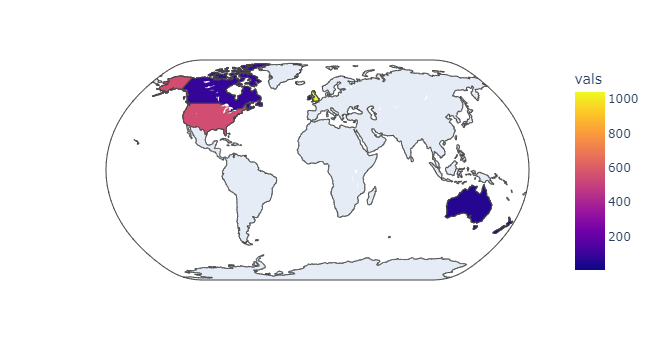

In [39]:
list_countries = ["AUS","CAN","NZL","IRL","GBR","USA"]
count_cases_cty = pd.DataFrame.from_dict(count_cases("Country",clean_data))
count_cases_cty = count_cases_cty[count_cases_cty["keys"]!='Other']
count_cases_cty["iso_alpha"] = list_countries

fig = px.choropleth(count_cases_cty, locations="iso_alpha",
                    color="vals", # lifeExp is a column of gapminder
                    hover_name="keys", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    projection="natural earth")


fig.show()

## PCA 

Here we will see a few plots derived from the Principal Component Analysis (PCA) made on the whole set of attributes and by fixing a drug. That allow us to better visualize the observations

### For Benzodiazepine consumption

Scree plot


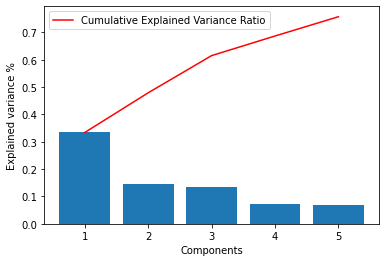

[0.33405374 0.14517709 0.13601283 0.07179441 0.07054078]
Biplot


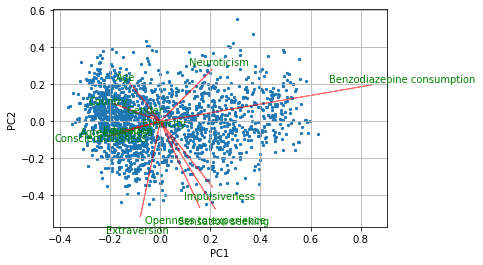

Scatter plot 2D


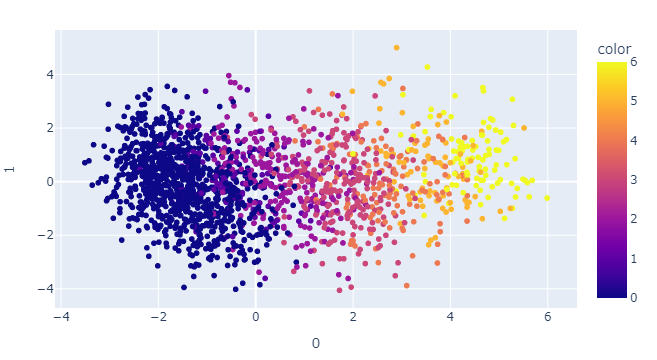

Scatter plot 3D


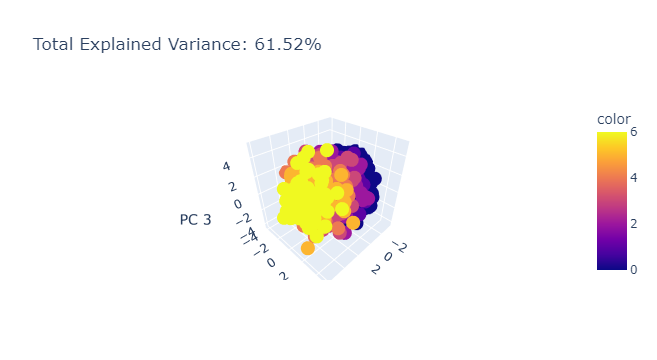

Contributions
           Age    Gender  Education   Country  Ethnicity  Neuroticism  \
PC-1 -0.281039 -0.228735  -0.202828 -0.368875   0.109955     0.228693   
PC-2  0.111182  0.034133  -0.164515  0.045351  -0.055123     0.434319   
PC-3 -0.132977  0.576080   0.332049 -0.165124   0.350927     0.351732   

      Extraversion  Openness to experience  Agreeableness  Conscientiousness  \
PC-1     -0.068695                0.255811      -0.233715          -0.323639   
PC-2     -0.589579               -0.394597      -0.206363          -0.309632   
PC-3     -0.077214                0.251269       0.305097           0.081050   

      Impulsiveness  Sensation seeking  Benzodiazepine consumption  
PC-1       0.373816           0.401459                    0.310915  
PC-2      -0.161157          -0.303802                    0.075131  
PC-3      -0.110360          -0.088285                    0.278095  


In [40]:
pca("Benzodiazepine consumption",binary=False)

### For Heroin consumption

Scree plot


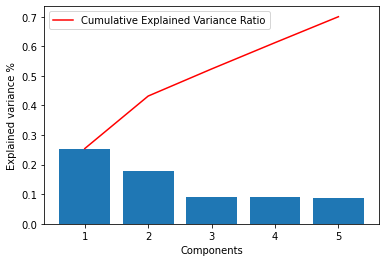

[0.25441989 0.17754777 0.09158313 0.08892922 0.08771499]
Biplot


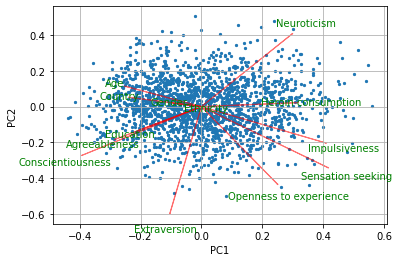

Scatter plot 2D


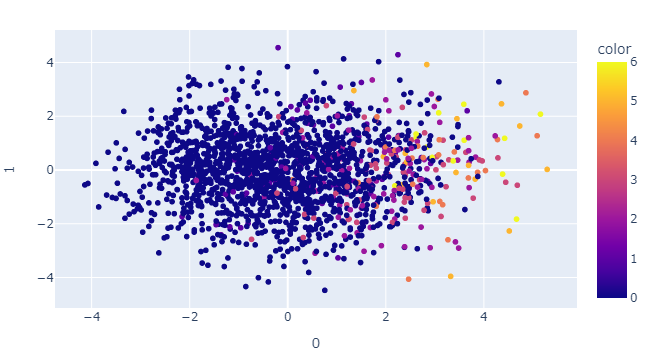

Scatter plot 3D


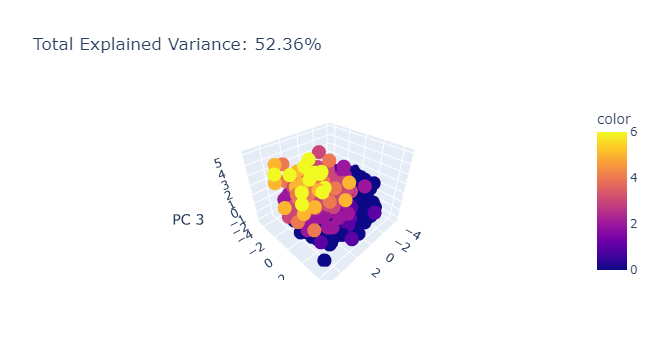

Contributions
           Age    Gender  Education   Country  Ethnicity  Neuroticism  \
PC-1 -0.290623 -0.238270  -0.208984 -0.366018   0.103180     0.219753   
PC-2  0.104013  0.025704  -0.171666  0.043870  -0.058706     0.434285   
PC-3 -0.156383  0.645684   0.396613 -0.027028   0.304285     0.441062   

      Extraversion  Openness to experience  Agreeableness  Conscientiousness  \
PC-1     -0.063494                0.256903      -0.240769          -0.327216   
PC-2     -0.590751               -0.394339      -0.214438          -0.317515   
PC-3     -0.061476                0.235724       0.219920          -0.042840   

      Impulsiveness  Sensation seeking  Heroin consumption  
PC-1       0.384297           0.412442            0.263289  
PC-2      -0.152094          -0.295182            0.059340  
PC-3       0.059805           0.016694           -0.008837  


In [41]:
pca("Heroin consumption",binary=False)

### For Nicotine consumption

Scree plot


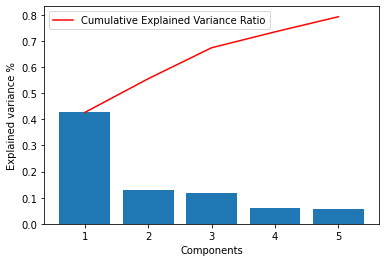

[0.42620999 0.12904329 0.1186632  0.06079113 0.05798029]
Biplot


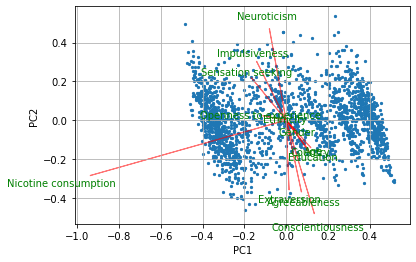

Scatter plot 2D


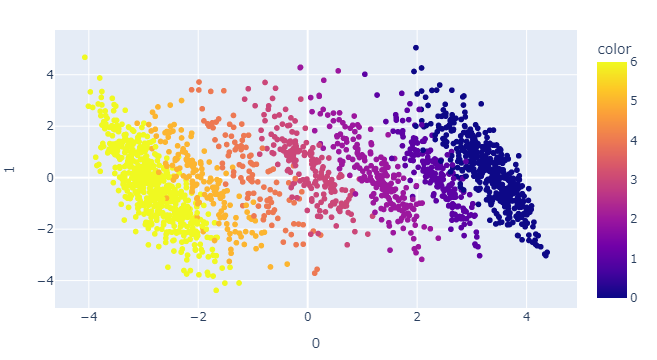

Scatter plot 3D


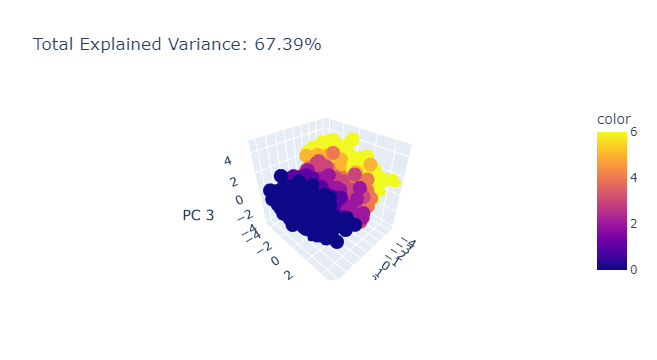

Contributions
           Age    Gender  Education   Country  Ethnicity  Neuroticism  \
PC-1 -0.297167 -0.237950  -0.216012 -0.353310   0.103972     0.202340   
PC-2  0.089653  0.015804  -0.179758  0.033477  -0.053518     0.444469   
PC-3 -0.040883  0.584994   0.498233  0.066718   0.234480     0.448333   

      Extraversion  Openness to experience  Agreeableness  Conscientiousness  \
PC-1     -0.048451                0.258124      -0.222795          -0.321240   
PC-2     -0.593576               -0.384245      -0.225840          -0.335918   
PC-3     -0.024592                0.222306       0.043145          -0.089241   

      Impulsiveness  Sensation seeking  Nicotine consumption  
PC-1       0.377474           0.411394              0.313514  
PC-2      -0.132632          -0.276006             -0.016456  
PC-3       0.206362           0.108737             -0.182152  


In [42]:
pca("Nicotine consumption",binary=False)

### For Alcohol consumption

Scree plot


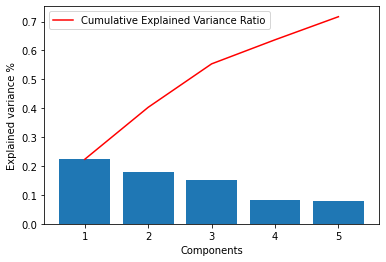

[0.22341108 0.1798949  0.150385   0.08333614 0.07990899]
Biplot


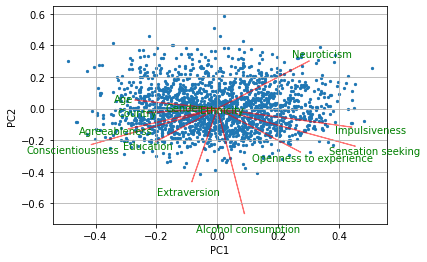

Scatter plot 2D


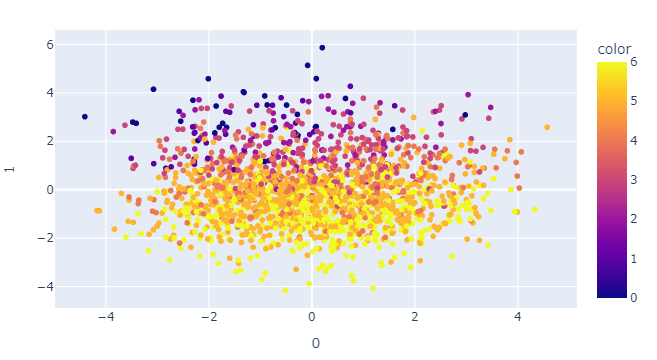

Scatter plot 3D


Contributions
           Age    Gender  Education   Country  Ethnicity  Neuroticism  \
PC-1 -0.307753 -0.246864  -0.212621 -0.367959   0.109833     0.218218   
PC-2 -0.088682 -0.012779   0.196895 -0.020944   0.059763    -0.430411   
PC-3 -0.122005 -0.324228  -0.477054 -0.289198  -0.132483    -0.330722   

      Extraversion  Openness to experience  Agreeableness  Conscientiousness  \
PC-1     -0.053321                0.271409      -0.244311          -0.339945   
PC-2      0.589862                0.378981       0.213030           0.325803   
PC-3      0.007820                0.003932       0.178902           0.128673   

      Impulsiveness  Sensation seeking  Alcohol consumption  
PC-1       0.403808           0.434559             0.020093  
PC-2       0.139677           0.283384             0.145020  
PC-3      -0.220488          -0.118108            -0.575015  


In [43]:
pca("Alcohol consumption",binary=False)

<div class="alert alert-block alert-info">
    <b>Analysis:</b><br>
     From these graphs we can infer several things:<br><br>
    <li> By looking at the Scree plot we can see how well the PCA explain the variance of the data
    So if by taking the cumulative percentage of variance explained by the first two or three principal component we don't obtain something at least about 70% that means the PCA was not efficient to explain the variance of the data.</li>
    <li> By looking at the Biplot we can see the points of the observations plotted on the plane formed by the two best principal components. On top of this we can see the graph of the variables.<br>
    To interpret this graph:<br>
    - Positively correlated variables are grouped together.<br> 
    - Negatively correlated variables are positioned on opposite sides of the origin of the graph (opposite quadrants).<br>
    - The distance between the variables and the origin measures how well the variables are represented. Variables that are far from the origin are well represented by the PCA.</li><br>
    <li> Depending on the drug that had been fixed we can see that the variables that are near to the consumption variable are different or sometimes there is no variable correlated to the consumption of the drug. </li>
    <li> Finally we can see the set of points represented in the plane formed by the first 2 principal components and in the space formed by the first 3 principal components.</li>    
</div>

## Correlation heatmaps

### Correlation between features

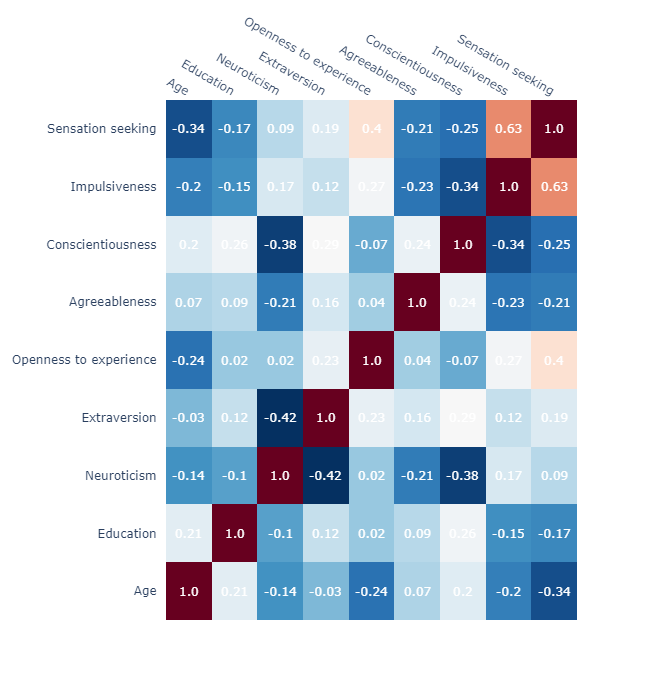

In [44]:
corr_heatmap(relevant_features,clean_data_numeric)

<div class="alert alert-block alert-info">
    <b>Analysis:</b><br>
     No strong correlations but some moderate and weak-moderate ones:<br><br>  
    <li> Neuroticism for example has no positive correlation with any other personality trait. It has a weak-moderate downhill correlation with extraversion and conscientiousness</li>
    <li>Extraversion has only weak positive correlation with other personnality traits except for Neuroticism where there is a moderate negative correlation. </li>
    <li> <b>Tip:</b> If you feel a lot of negative emotions, try to emulate the behavior of extroverts and see how it goes ;) </li>
    <li> Impulsiveness and Sensation seeking have a significant positive correlation meaning these personality traits are evolving somewhat together through the observations. </li>
</div>

## Correlations between drug consumptions

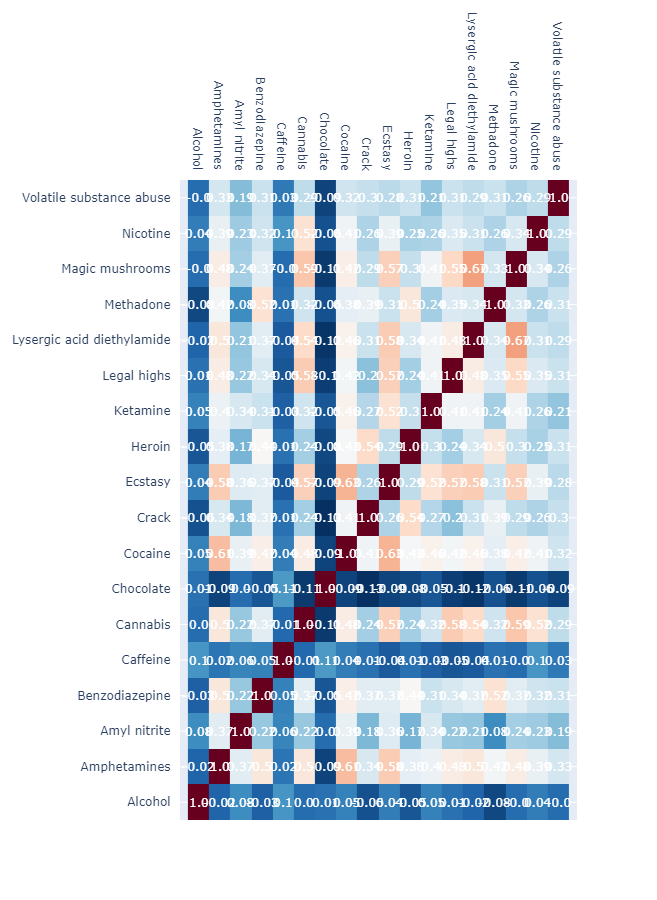

In [45]:
corr_heatmap(drugs_col,clean_data_numeric)

<div class="alert alert-block alert-info">
    <b>Analysis:</b><br>
    <li>Alcohol, caffeine and chocolate don't correlate with any other drugs (too weak relations).</li>  
    <li>Lysergic acid diethylamide / Magic mushrooms, Cocaine / Ecstasy, Amphetamines / Cocaine ,Cannabis / Magic mushrooms are the strongest positive correlations between drug consumptions but they are still moderate correlations. That allow us to distinguish some patterns of drugs associations in the set of observations</li>
    <li>Interestingly there's no, not even weak, negative correlations between drugs</li>
</div>

## Correlations between legal drugs and features

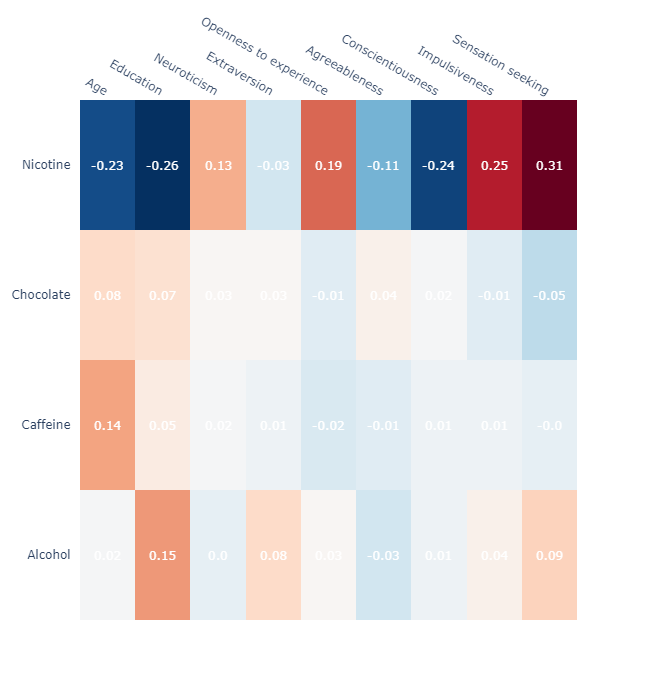

In [46]:
corr_heatmap_2(legal_drugs,relevant_features,clean_data_numeric)

<div class="alert alert-block alert-info">
    <b>Analysis:</b><br>
    <li>Except for Nicotine, there is no correlation between legal drug consumption and any feature </li>
</div>

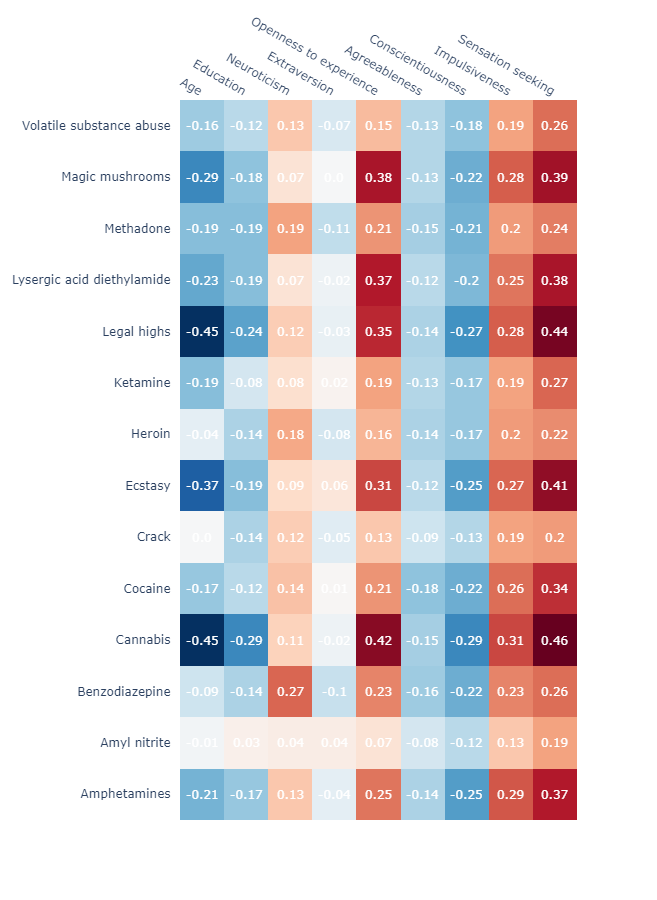

In [47]:
corr_heatmap_2(illegal_drugs,relevant_features,clean_data_numeric)

<div class="alert alert-block alert-info">
    <b>Analysis:</b><br>
    <li>Sensation seeking and impulsiveness have positive moderate to weak correlation for every illegal drug </li>
    <li>Agreableness and Conscientiousness have negative weak correlation for every illegal drug </li>
    <li>Openness to experience and Neuroticism have positive weak correlation for every illegal drug</li>
    <li>Finally we can see that the older the person the less drug they use because there is only negative weak to moderate correlations </li>
</div>

# **Machine Learning**

## Building the predictive dataframe

In [48]:
X = clean_data_numeric.copy().drop(clean_data_numeric[drugs_col], axis=1)
X.drop(["Country","Gender","Ethnicity"],axis=1,inplace=True) # Biased variables
#X = X.rename(columns={"Neuroticism": "Nscore", "Extraversion": "Escore", "Openness to experience":"Oscore", "Agreeableness":"Ascore", "Conscientiousness":"Cscore","Impulsiveness":"Impulsive"})
X.head()

Age  Education  Neuroticism  Extraversion  Openness to experience  \
0  0.49788   -0.05921      0.31287      -0.57545                -0.58331   
1 -0.07854    1.98437     -0.67825       1.93886                 1.43533   
2  0.49788   -0.05921     -0.46725       0.80523                -0.84732   
3 -0.95197    1.16365     -0.14882      -0.80615                -0.01928   
4  0.49788    1.98437      0.73545      -1.63340                -0.45174   

   Agreeableness  Conscientiousness  Impulsiveness  Sensation seeking  
0       -0.91699           -0.00665       -0.21712           -1.18084  
1        0.76096           -0.14277       -0.71126           -0.21575  
2       -1.62090           -1.01450       -1.37983            0.40148  
3        0.59042            0.58489       -1.37983           -1.18084  
4       -0.30172            1.30612       -0.21712           -0.21575

<div class="alert alert-block alert-info">
    <b>Remark:</b><br>
    According to the results that we obtained from the data visualization, we have decided to remove the variables <code>Country</code>, <code>Ethnicity</code> and <code>Gender</code> from the predictive variables are they bring too much biais to the information.
</div>

### Multilabel Classification

<div class="alert alert-block alert-info">
    At first, we were looking for a model that could predict multiple labels for one observation: in this case, predict all the drugs that an individual would probably take according to all those features. 
    To do so, we used a multilabel classification model from <code>sklearn.multioutput</code>.
</div>

In [49]:
def PredictTakenDrugs(X,df,drugs):
    # Prepare data
    outputs=df[drugs]
    y_multiclass = outputs.copy()
    for i in range(len(y_multiclass)):
        for drug in drugs:
            if y_multiclass.loc[i,drug]>0:
                y_multiclass.loc[i,drug]=1
            else:
                y_multiclass.loc[i,drug]=0
                
    # Split dataset into train and test set
    X_train,X_test,y_train,y_test=train_test_split(X,y_multiclass,test_size=0.2,random_state=9)            
    # Build multi_label_Classifier
    rfc_ml_clf = RandomForestClassifier(n_estimators=200,random_state=4)
    multi_label_clf = MultiOutputClassifier(rfc_ml_clf)
    multi_label_clf.fit(X_train,y_train)
    y_pred = multi_label_clf.predict(X_test)    
    score_cm = accuracy_score(y_test, y_pred)
    return score_cm,multi_label_clf

<div class="alert alert-block alert-info">
    <b>Explanation:</b><br>
    <li>The parameter <code>drugs</code> allow us to chose which drugs to be predicted by the model.</li>
    <li>We binarise the outputs for the drugs that we need to predict: 1 if the user has already consumed this drug, 0 if never.</li>
    </div>

In [50]:
print(f"Accuracy score for multilabel classification on legal drugs: {PredictTakenDrugs(X,clean_data_numeric,legal_drugs)[0]*100:.2f}%")
print(f"Accuracy score for multilabel classification on illegal drugs: {PredictTakenDrugs(X,clean_data_numeric,illegal_drugs)[0]*100:.2f}%")
print(f"Accuracy score for multilabel classification on all drugs: {PredictTakenDrugs(X,clean_data_numeric,drugs_col)[0]*100:.2f}%")

Accuracy score for multilabel classification on legal drugs: 75.27%
Accuracy score for multilabel classification on illegal drugs: 9.84%
Accuracy score for multilabel classification on all drugs: 5.85%


<div class="alert alert-block alert-info">
    <b>Analysis:</b><br>
    <li>We observe that for a few labels to predict (4 with <code>legal_drugs</code>), the model is quite efficient.</li>
    <li>But for a larger number of labels (18 with <code>drugs_col</code>), the model is poorly accurate. This is due to the fact that it is more difficult for the model to predict the exact same sequence of 18 correct outputs than for a fewer amount.</li>    
</div>

In [51]:
_,mod = PredictTakenDrugs(X,clean_data_numeric,drugs_col)

In [52]:
I_drug=[-0.95197,-2.43591,2,2,2,-2,-2,2,2]
I_notDrug=[2.59171,1.98437,-2,-2,-2,2,2,-2,-2]
I_lambda=[-0.07854,-0.05921,0,0,0,0,0,0,0]
df_test = pd.DataFrame([I_drug,I_notDrug,I_lambda],columns=X.columns.values)
df_test
pred_test = mod.predict(df_test)

print("Outputs obtained for different type of users:")
print(f"Individual likely to use drugs: {pred_test[0]}")
print(f"Individual likely to use no drugs: {pred_test[1]}")
print(f"Lambda Individual likely to use some drugs: {pred_test[2]}")

Outputs obtained for different type of users:
Individual likely to use drugs: [1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0]
Individual likely to use no drugs: [1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
Lambda Individual likely to use some drugs: [1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0]


<div class="alert alert-block alert-info">
    We tried the reliability of the model by giving it some manually made individuals for which we knew what the expected output would be. But we notice that from those results, a lambda individual with average feature values is more likely to consume as many drugs as an individual expected to be a bigger drug user. Therefore, we decided not to use this model for the continuity of our study.
</div>

## Using the binary outputs

<div class="alert alert-block alert-info">
    <b>Problem:</b><br>
    <b>Use of ML models to predict if a given user has recently (in the last month: CL4, CL5 or CL6) consumed any illegal drugs.</b><br><br>
    <li>We will use the <code>bin_ouputs</code> dataframe we created earlier where we changed the values from the <code>drugs_col</code> columns to 1 if the class of the last use of the drug is greater or equal than class 4, and 0 if it is lower than class 4.</li>
    <li>Then, we will create a new vector stating 1 if the user has recently used illegal drugs, and 0 if not, based on the number of illegal drugs they consumed, which is fixed here as 1.</li>
        <li>Since we will only make predictions on illegal_drugs we will drop the <code>legal_drugs</code> columns from the <code>bin_ouputs</code> dataframe.</li>
</div>

In [53]:
recent_user = [1 if bin_outputs.loc[i,illegal_drugs].sum() > 1 else 0 for i in range(len(bin_outputs)) ]

### Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

def IsRecentUserPrediction_LogReg(X,y):
    # For 1 drug at a time. Need to manually change the value
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

    reg_log = LogisticRegression()
    reg_log.fit(X_train, y_train)
    y_pred = reg_log.predict(X_test)
    cm = metrics.confusion_matrix(y_test, y_pred)
    score_cm = accuracy_score(y_test, y_pred)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title(f"Is a recent user? \nAccuracy score: {score_cm*100:.2f}%")   
    
    return score_cm,reg_log,X_train

### LDA

In [55]:
def IsRecentUserPrediction_LDA(X,y):
 # For 1 drug at a time. Need to manually change the value
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

    clf = LDA()
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    cm = metrics.confusion_matrix(y_test, y_pred)
    score_cm = accuracy_score(y_test, y_pred)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title(f"Is a recent user? \nAccuracy score: {score_cm*100:.2f}%")
    
    return score_cm,clf

### Random Forest Classifier

In [56]:
def IsRecentUserPrediction_RFC(X,y):
 # For 1 drug at a time. Need to manually change the value
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

    clf = RandomForestClassifier(n_estimators=200,random_state=1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    cm = metrics.confusion_matrix(y_test, y_pred)
    score_cm = accuracy_score(y_test, y_pred)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title(f"Is a recent user? \nAccuracy score: {score_cm*100:.2f}%")
    
    return score_cm,clf

### SVC

In [57]:
def IsRecentUserPrediction_SVC(X,y):
 # For 1 drug at a time. Need to manually change the value
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

    clf = svm.SVC()
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    cm = metrics.confusion_matrix(y_test, y_pred)
    score_cm = accuracy_score(y_test, y_pred)    
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title(f"Is a recent user? \nAccuracy score: {score_cm*100:.2f}%")
    
    return score_cm,clf

### KNN

In [58]:
def IsRecentUserPrediction_KNN(X,y):
 # For 1 drug at a time. Need to manually change the value
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

    clf = KNeighborsClassifier(10)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    cm = metrics.confusion_matrix(y_test, y_pred)
    score_cm = accuracy_score(y_test, y_pred)    
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title(f"Is a recent user? \nAccuracy score: {score_cm*100:.2f}%")
    
    return score_cm,clf

### XGBoost Classifier

In [59]:
def IsRecentUserPrediction_XGB(X,y):
 # For 1 drug at a time. Need to manually change the value
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

    clf = xgb.XGBClassifier(random_state=42,gpu_id=0,use_label_encoder=False) # build classifier
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    cm = metrics.confusion_matrix(y_test, y_pred)
    score_cm = accuracy_score(y_test, y_pred)    
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title(f"Is a recent user? \nAccuracy score: {score_cm*100:.2f}%")
    
    return score_cm,clf

[02:29:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


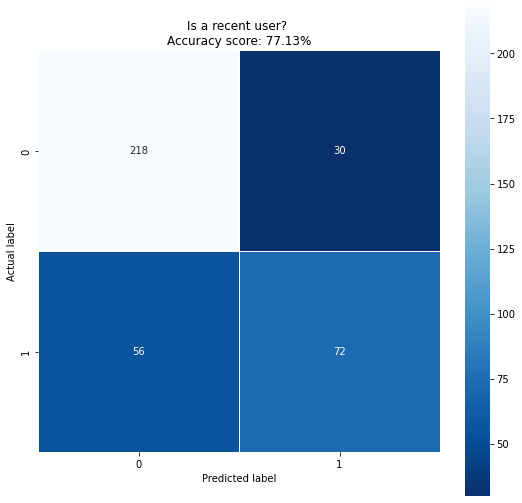

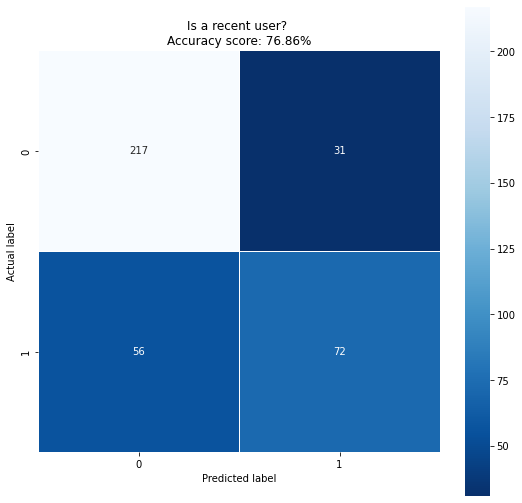

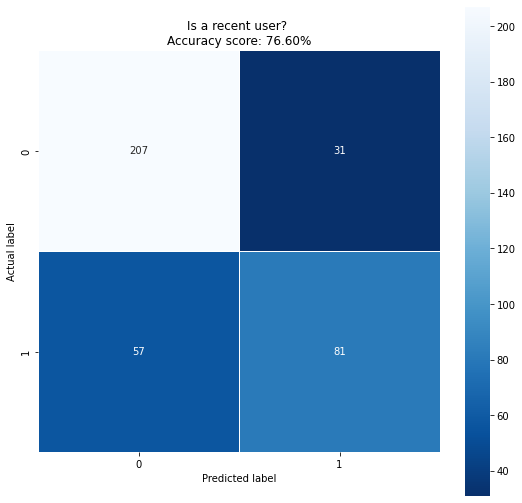

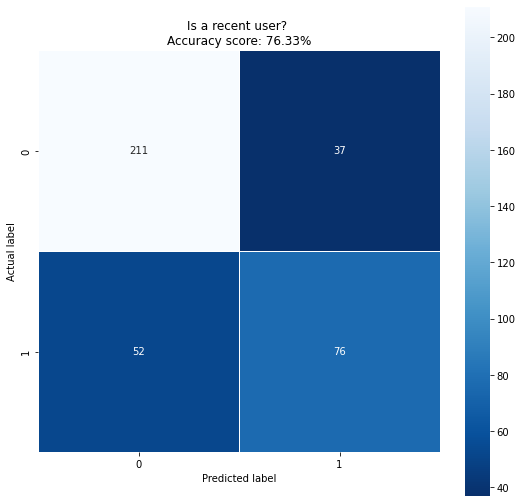

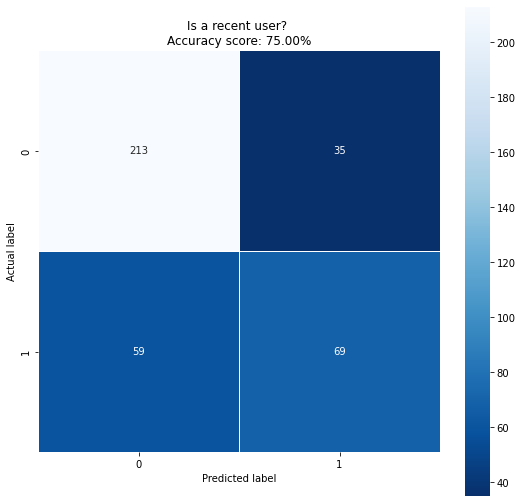

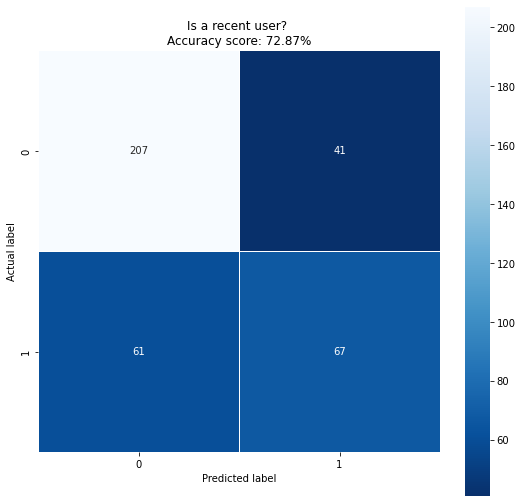

In [60]:
clf_scores = {}

clf_scores["LogReg"], lg_mod, X_train_lg = IsRecentUserPrediction_LogReg(X,recent_user)
clf_scores["LDA"], lda_clf = IsRecentUserPrediction_LDA(X,recent_user)
clf_scores["RFC"], rfc_clf = IsRecentUserPrediction_RFC(X,recent_user)
clf_scores["SVC"], svc_clf = IsRecentUserPrediction_SVC(X,recent_user)
clf_scores["KNN"], knn_clf = IsRecentUserPrediction_KNN(X,recent_user)
clf_scores["XGB"], xgb_mod = IsRecentUserPrediction_XGB(X,recent_user)   

In [61]:
clf_scores

{'LogReg': 0.7712765957446809,
 'LDA': 0.7686170212765957,
 'RFC': 0.7659574468085106,
 'SVC': 0.7632978723404256,
 'KNN': 0.75,
 'XGB': 0.7287234042553191}

<div class="alert alert-block alert-info">
    <b>Analysis:</b><br>
    <li>From all of these classification models, we noticed that logistic regression was the most efficient one, as it is only used for binary classification and that the model trains itself faster.</li>
    <li>Thus, this model will be the one that we are going to use in the Django API for live predictions.</li>
</div>


### Explainable AI

<div class="alert alert-block alert-info">
    <li>Explainable AI is used to help us understand not how, but why the model makes such predictions. 
    <li>To do so, we will generate and analyse the SHAP values based on our model.</li>
    <li>The SHAP (SHapley Additive exPlanations) is a model agnostic tool that allows to explain the responsibility of each variables for the given prediction.</li>
    <li>Each feature is partially responsible for the prediction, and we want to know how much responsibility does each feature claim for the difference between the actual predicted value and the average value.</li>
</div>

In [63]:
shap.initjs()

# Generate the Linear explainer and SHAP values for the logistic regression model
model=lg_mod
masker = shap.maskers.Independent(data = X_train_lg)
explainer = shap.LinearExplainer(model, masker = masker)
shap_values = explainer.shap_values(X)
expected_value = explainer.expected_value

#### SHAP Visualizations

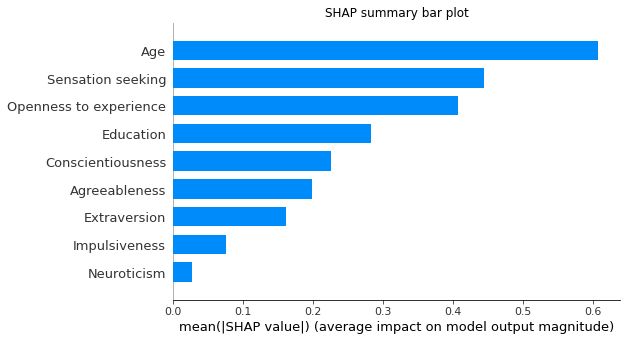

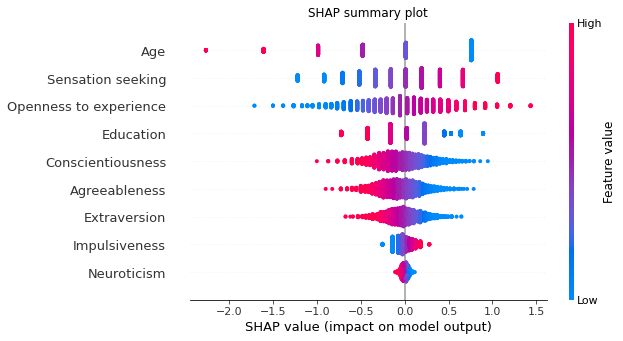

In [64]:
# Generate summary bar plot 
shap.summary_plot(shap_values, X,plot_type="bar",show=False) 
plt.title("SHAP summary bar plot")
plt.show()

# Generate summary dot plot
shap.summary_plot(shap_values, X,show=False) 
plt.title("SHAP summary plot")
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis:</b><br>
    <li>These plots allows us to understand the average responsibility of each feature applied on this model. The features are ordered according to their importance.</li>
    <li>The first one shows the average impact of each feature on the model output, by taking the mean absolute SHAP value of each feature.</li>
    <li>On the second one, the summary plot combines feature importance with feature effects.</li>
    <li>Each point on the summary plot is a Shapley value for a feature and an individual. 
    <li>The position on the y-axis is determined by the feature and on the x-axis by the Shapley value.</li> 
    <li>The color represents the value of the feature from low to high.</li> 
    <li>Overlapping points are jittered in y-axis direction, so we get a sense of the distribution of the Shapley values per feature.</li>
    <li>For example, the older the individual is, the more negatively they contribute the model output. In this case, there is less chances for them to be recent users.</li>
</div>

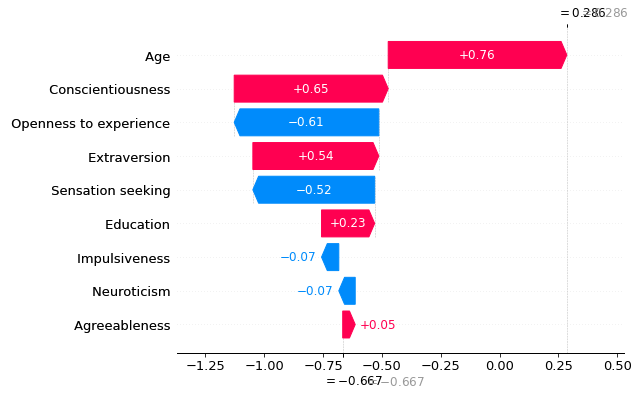

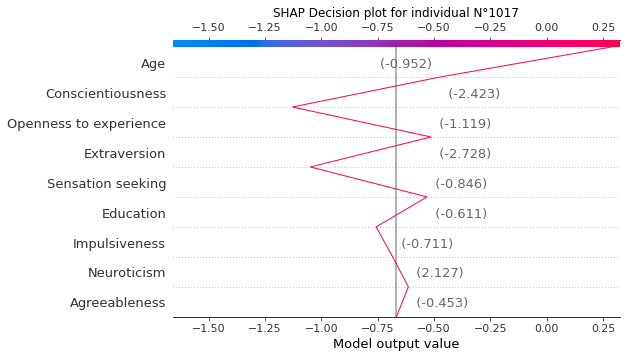

Expected value of the model output: -0.6666088184855723


In [65]:
# Generate waterfall plot  
indiv_index=1017
shap.plots._waterfall.waterfall_legacy(expected_value, shap_values[indiv_index], features=X.loc[indiv_index,:], feature_names=X.columns, max_display=15, show=True)

# Generate Decision plot 
shap.decision_plot(expected_value, shap_values[indiv_index,:],features=X.loc[indiv_index,:], feature_names=(X.columns.tolist()),show=True,title=f"SHAP Decision plot for individual N°1017")

print(f"Expected value of the model output: {expected_value}")

<div class="alert alert-block alert-info">
    <b>Analysis:</b><br>
    <li>The waterfall and decision plot are complementary plots that explain the decision making process of the prediction for a given individual (combination of features).</li>
    <li>Here, the SHAP value is the expected difference of the prediction from two individuals where this value was changed. </li>
</div>
